In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [2]:
df  = pd.read_csv("C://Users//user//OneDrive//Desktop//real_fake_news.csv")

In [3]:
df.head(2)

,Unnamed: 0,Unnamed: 0.1,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,0,0,Jill Terreri,"New York is ""leading the nation with the lowes...",NYS Department of Corrections and Community Su...,True,REAL,1
1,1,1,Eleanor Hildebrandt,“Iowa ranks 45th in the U.S. for internet conn...,Cindy Axne,True,REAL,1


In [4]:
## DATA PRE-PROCESSING

#Finding out missing values in each column
print(df.isna().sum())
missing_status=df.isna().sum()
##print(df.isnull().sum())

Unnamed: 0         0
Unnamed: 0.1       0
author             0
statement          0
source             0
target             0
BinaryTarget       0
BinaryNumTarget    0
dtype: int64


In [5]:
df[df.duplicated(keep = 'last')] 

,Unnamed: 0,Unnamed: 0.1,author,statement,source,target,BinaryTarget,BinaryNumTarget


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       4870 non-null   int64 
 1   Unnamed: 0.1     4870 non-null   int64 
 2   author           4870 non-null   object
 3   statement        4870 non-null   object
 4   source           4870 non-null   object
 5   target           4870 non-null   bool  
 6   BinaryTarget     4870 non-null   object
 7   BinaryNumTarget  4870 non-null   int64 
dtypes: bool(1), int64(3), object(4)
memory usage: 271.2+ KB


In [8]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'author', 'statement', 'source', 'target',
       'BinaryTarget', 'BinaryNumTarget'],
      dtype='object')

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.author = le.fit_transform(df.author)
df.source = le.fit_transform(df.source)
df.head(2)


,Unnamed: 0,Unnamed: 0.1,author,statement,source,target,BinaryTarget,BinaryNumTarget
0,0,0,128,"New York is ""leading the nation with the lowes...",1035,True,REAL,1
1,1,1,82,“Iowa ranks 45th in the U.S. for internet conn...,247,True,REAL,1


In [30]:
X=df[['author','source']]
Y=df[['BinaryNumTarget']]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

In [14]:
df.nunique()

Unnamed: 0         2436
Unnamed: 0.1       2436
author              318
statement          4866
source             1493
target                2
BinaryTarget          2
BinaryNumTarget       2
dtype: int64

In [31]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, Y_train)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

In [32]:
Y_pred = knn.predict(X_test)

In [33]:
confusion_matrix(Y_test, Y_pred)

array([[477, 128],
       [ 81, 532]], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.8284072249589491

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

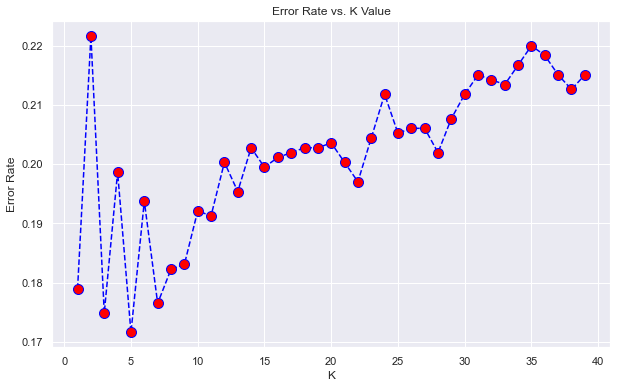

Minimum error:- 0.17159277504105086 at K = 5


In [35]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(Y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [39]:
#same value for K, no need to change

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.tree import export_graphviz
import graphviz

In [41]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [42]:
X=df[['author','source']]
Y=df[['BinaryNumTarget']]

In [43]:
ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)

StandardScaler()

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(
                                                     X,
                                                     Y,
                                                     test_size = 0.3,
                                                     shuffle = True,
                                                     stratify = Y
                                                    )

In [45]:
X_train.shape 
print()

X_test.shape  
print()

(3409, 2)

(1461, 2)

In [46]:
ct = dtree(
           criterion="gini",    
           max_depth=None      
           )

In [47]:
ct.fit(X_train,Y_train)

DecisionTreeClassifier()

In [48]:
Y_pred = ct.predict(X_test)

In [49]:
print("Accuracy:",accuracy_score(Y_test, Y_pred))

Accuracy: 0.8624229979466119


<Figure size 864x504 with 0 Axes>

[Text(493.4937204474322, 372.2478260869565, 'X[1] <= 1.557\ngini = 0.5\nsamples = 3409\nvalue = [1705, 1704]'),
 Text(345.1503539997981, 355.70347826086953, 'X[1] <= -0.356\ngini = 0.493\nsamples = 2979\nvalue = [1315, 1664]'),
 Text(149.13094122299253, 339.1591304347826, 'X[1] <= -0.741\ngini = 0.483\nsamples = 1727\nvalue = [1024, 703]'),
 Text(54.840626472369934, 322.61478260869563, 'X[1] <= -1.306\ngini = 0.436\nsamples = 679\nvalue = [218, 461]'),
 Text(33.441690785488326, 306.0704347826087, 'X[1] <= -1.411\ngini = 0.22\nsamples = 239\nvalue = [30, 209]'),
 Text(13.520899239415765, 289.52608695652174, 'X[0] <= -0.832\ngini = 0.385\nsamples = 96\nvalue = [25, 71]'),
 Text(5.768917008817393, 272.9817391304348, 'X[1] <= -1.562\ngini = 0.111\nsamples = 34\nvalue = [2, 32]'),
 Text(2.8844585044086966, 256.4373913043478, 'X[0] <= -1.347\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(1.4422292522043483, 239.89304347826086, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(4.3266877566

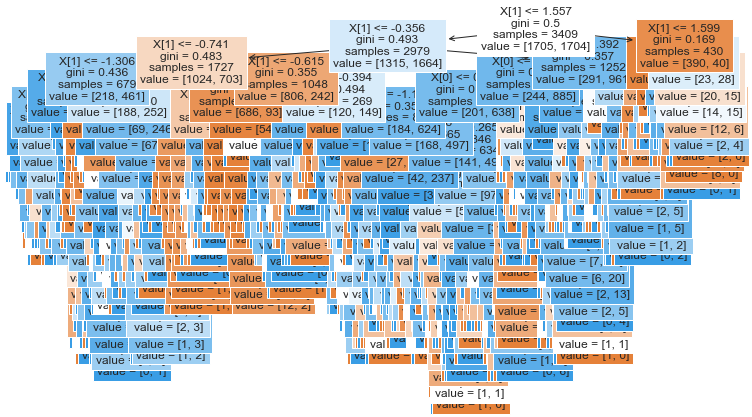

In [50]:
from sklearn import tree
plt.figure(figsize=(12,7))
tree.plot_tree(ct, filled=True, fontsize=12)

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

In [55]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)

C:\Users\user\AppData\Local\Temp/ipykernel_10196/716668125.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, Y_train)


RandomForestClassifier()

In [57]:
Yhat = clf.predict(X_test)
print (Yhat)
# evaluate predictions
mae = mean_absolute_error(Y_test, Yhat)
print('MAE: %.3f' % mae)

[1 1 0 ... 0 1 0]
MAE: 0.126


In [58]:
y_pred=clf.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
accuracy_score(Y_test, Y_pred)

0.8624229979466119

In [61]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index =['author','source']).sort_values(ascending=False)
feature_imp

source    0.647451
author    0.352549
dtype: float64

<AxesSubplot:>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features')

No handles with labels found to put in legend.


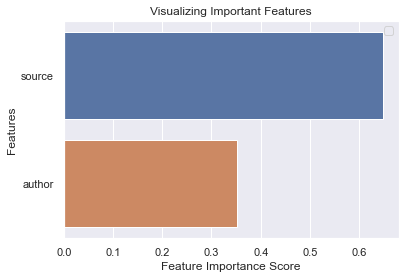

In [62]:
#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
#Dtree gives highest accuracy